**Objective:**

The Primary objective of the Cost of Living Index 2022 dataset is to provide a ranking of countries based on their cost of living to help individuals and businesses understand which countries are more or less affordable, and also examine the relationship between rent, groceries, restaurant prices, and purchasing power. Assists expats, travellers, and businesses in choosing cost-effective locations and helps policymakers and economists analyze global living conditions and economic trends. It also shows differences in affordability. between the developed and developing countries and offers Insights into how local purchasing power affects the standard of living.

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

**Data Collection**

In [24]:
# Load the dataset
df = pd.read_csv("/content/Cost_of_Living_Index_2022.csv")
df.head()

,Rank,Country,Cost_of_Living,Rent,Cost_Living_Rent,Groceries,Restaurant_Prices,Local_Purchasing_Power
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86


In [25]:
# Rename columns for better readability
df.rename(columns={
    "Cost of Living Index": "Cost_of_Living",
    "Rent Index": "Rent",
    "Cost of Living Plus Rent Index": "Cost_Living_Rent",
    "Groceries Index": "Groceries",
    "Restaurant Price Index": "Restaurant_Prices",
    "Local Purchasing Power Index": "Local_Purchasing_Power"
}, inplace=True)

In [26]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Rank                      0
Country                   0
Cost_of_Living            0
Rent                      0
Cost_Living_Rent          0
Groceries                 0
Restaurant_Prices         0
Local_Purchasing_Power    0
dtype: int64


In [27]:
missing_values_after = df.isnull().sum()

In [28]:
missing_values, missing_values_after

(Rank                      0
 Country                   0
 Cost_of_Living            0
 Rent                      0
 Cost_Living_Rent          0
 Groceries                 0
 Restaurant_Prices         0
 Local_Purchasing_Power    0
 dtype: int64,
 Rank                      0
 Country                   0
 Cost_of_Living            0
 Rent                      0
 Cost_Living_Rent          0
 Groceries                 0
 Restaurant_Prices         0
 Local_Purchasing_Power    0
 dtype: int64)

In [29]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [30]:
# Convert numerical columns to appropriate data types
df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors= 'coerce')

In [31]:
# Display cleaned dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    139 non-null    int64  
 1   Country                 139 non-null    object 
 2   Cost_of_Living          139 non-null    float64
 3   Rent                    139 non-null    float64
 4   Cost_Living_Rent        139 non-null    float64
 5   Groceries               139 non-null    float64
 6   Restaurant_Prices       139 non-null    float64
 7   Local_Purchasing_Power  139 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.8+ KB


In [32]:
df.tail()

,Rank,Country,Cost_of_Living,Rent,Cost_Living_Rent,Groceries,Restaurant_Prices,Local_Purchasing_Power
134,135,Venezuela,43.20,9.99,27.63,37.34,46.23,15.41
135,136,Vietnam,37.48,13.22,26.11,38.70,19.98,29.38
136,137,Yemen,53.14,6.71,31.38,67.12,24.74,14.41
137,138,Zambia,33.04,9.26,21.90,31.53,22.46,40.33
138,139,Zimbabwe,45.68,8.75,28.37,39.88,38.13,19.07


In [33]:
# save the cleaned dataset
df.to_csv("/content/Cost_of_Living_Index_2022.csv", index=False)
print("Data preparation completed. Cleaned file saved.")

Data preparation completed. Cleaned file saved.


In [34]:
# Basic information and summary statistics
print("\nDataset Info:")
print(df.info())
print("n\Summary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    139 non-null    int64  
 1   Country                 139 non-null    object 
 2   Cost_of_Living          139 non-null    float64
 3   Rent                    139 non-null    float64
 4   Cost_Living_Rent        139 non-null    float64
 5   Groceries               139 non-null    float64
 6   Restaurant_Prices       139 non-null    float64
 7   Local_Purchasing_Power  139 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.8+ KB
None
n\Summary Statistics:
             Rank  Cost_of_Living        Rent  Cost_Living_Rent   Groceries  \
count  139.000000      139.000000  139.000000        139.000000  139.000000   
mean    70.000000       50.188633   19.291511         35.705324   46.637842   
std     40.269923       2

**Exploratory Data Analysis**

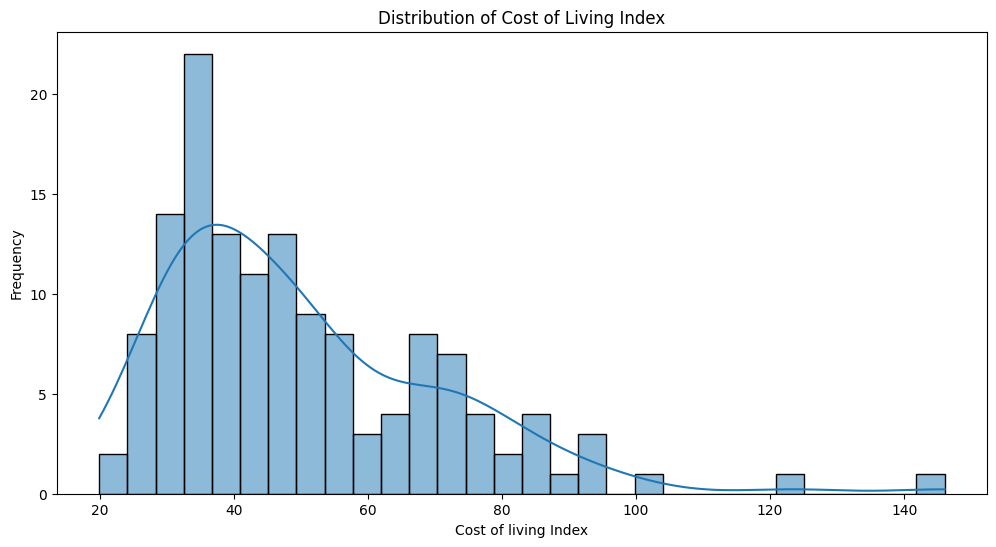

In [35]:
# Distribution Analysis
plt.figure(figsize=(12, 6))
sns.histplot(df["Cost_of_Living"], bins=30, kde=True)
plt.title("Distribution of Cost of Living Index")
plt.xlabel("Cost of living Index")
plt.ylabel("Frequency")
plt.show()

The above Distribution Analysis concludes following points:

*  The distirbution of Cost of Living suggests that most countries fall within a lower range, with a few outliers having exceptionally high costs.
*   Countries with highest cost of living have a significant gap compared to lower-cost regions.



In [36]:
#Correlation Analysis
corr_matrix = df.iloc[:, 2:].corr(method= 'pearson')
print("\nPearson Correlation Matrix:\n", corr_matrix)


Pearson Correlation Matrix:
                         Cost_of_Living      Rent  Cost_Living_Rent  Groceries  \
Cost_of_Living                1.000000  0.838079          0.974752   0.965435   
Rent                          0.838079  1.000000          0.938735   0.799108   
Cost_Living_Rent              0.974752  0.938735          1.000000   0.936967   
Groceries                     0.965435  0.799108          0.936967   1.000000   
Restaurant_Prices             0.934505  0.800190          0.917878   0.851450   
Local_Purchasing_Power        0.687244  0.638075          0.695304   0.626534   

                        Restaurant_Prices  Local_Purchasing_Power  
Cost_of_Living                   0.934505                0.687244  
Rent                             0.800190                0.638075  
Cost_Living_Rent                 0.917878                0.695304  
Groceries                        0.851450                0.626534  
Restaurant_Prices                1.000000                0.690

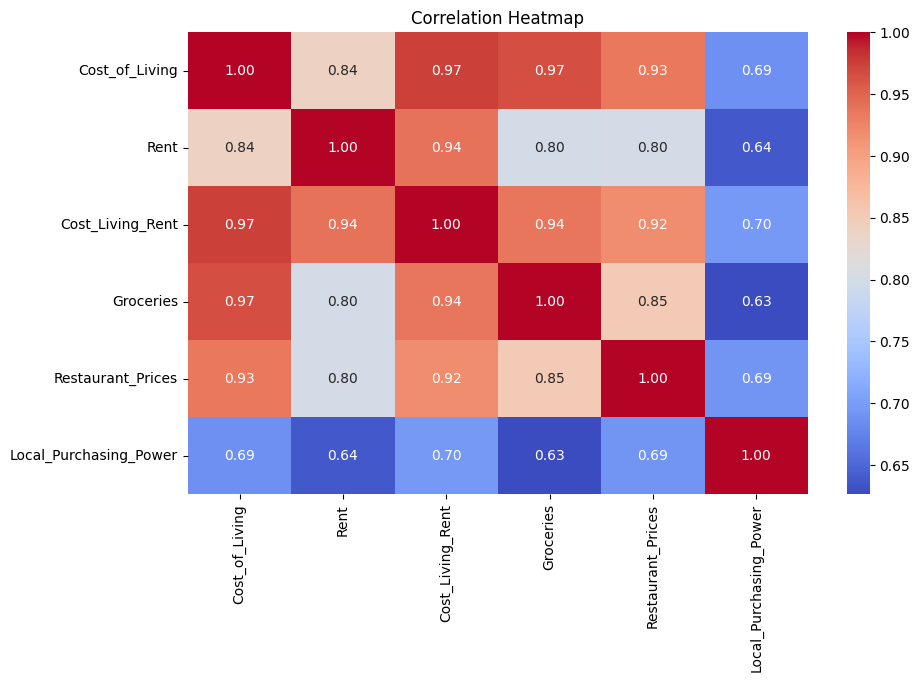

In [37]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

From the above Correlation Matrix, a few conclusions can be drawn as follows:

*   Rent Index and Cost of Living Index are positively correlated, meaning that in countries with a high cost of living, rent tends to be expensive as well.
*   Groceries Index, Restaurant Price Index, and cost of Living Index show a strong relationship, indicating that food prices significantly influence overall living expenses.



In [38]:
# Rank countries by cost of living (highest to lowest)
top_countries = df[['Country', 'Cost_of_Living']].sort_values(by='Cost_of_Living', ascending=False)
print("Top 10 countries by Cost of Living:\n", top_countries.head(10))

Top 10 countries by Cost of Living:
          Country  Cost_of_Living
15       Bermuda          146.04
119  Switzerland          123.35
90        Norway          100.90
51       Iceland           94.86
11      Barbados           92.37
62        Jersey           92.02
57        Israel           88.05
32       Denmark           84.12
8        Bahamas           84.00
109    Singapore           83.98


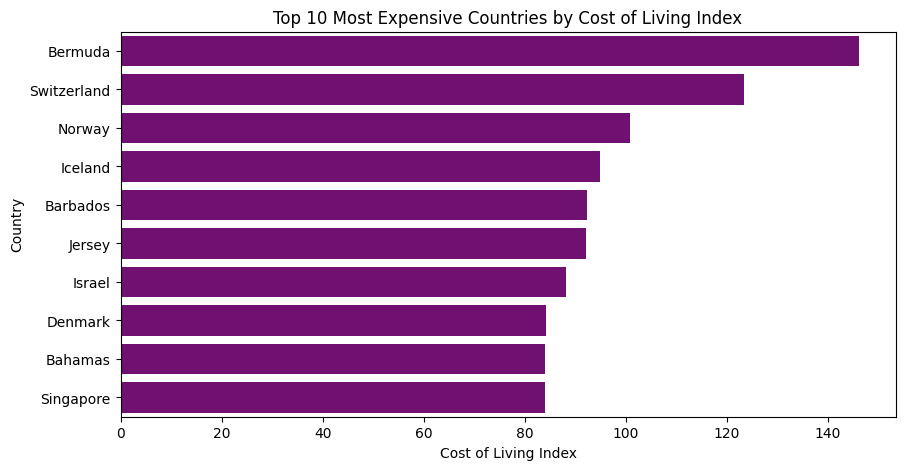

In [39]:
top_10 = df.nlargest(10, "Cost_of_Living")
plt.figure(figsize=(10, 5))
sns.barplot(y=top_10["Country"], x=top_10["Cost_of_Living"], color="purple")
plt.title("Top 10 Most Expensive Countries by Cost of Living Index")
plt.xlabel("Cost of Living Index")
plt.ylabel("Country")
plt.show()

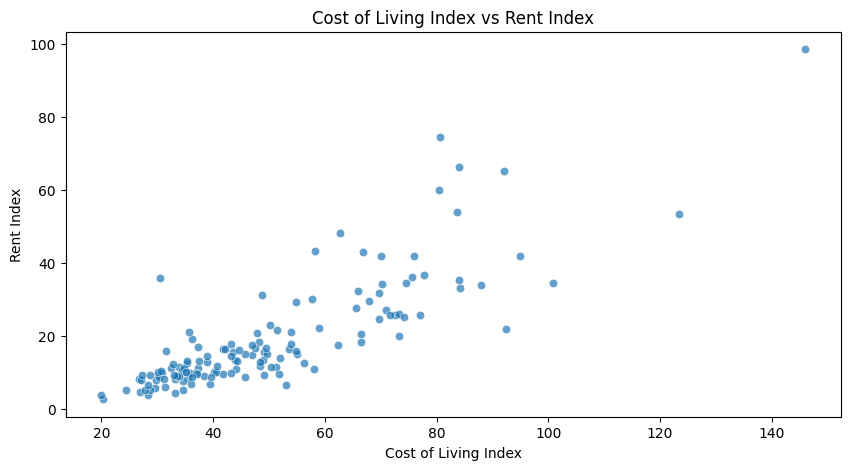

In [40]:
# Relationship between cost of living and Rent Index
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Cost_of_Living"], y=df["Rent"], alpha=0.7)
plt.title("Cost of Living Index vs Rent Index")
plt.xlabel("Cost of Living Index")
plt.ylabel("Rent Index")
plt.show()

In [41]:
# Normality Test(Shapiro-wilk test)
for col in df.columns[2:]:
  stat, p = stats.shapiro(df[col])
  print(f"Shapiro-Wilk Test for {col}: Statistics={stat:.4f}, p={p:.4f}")

Shapiro-Wilk Test for Cost_of_Living: Statistics=0.8893, p=0.0000
Shapiro-Wilk Test for Rent: Statistics=0.7817, p=0.0000
Shapiro-Wilk Test for Cost_Living_Rent: Statistics=0.8582, p=0.0000
Shapiro-Wilk Test for Groceries: Statistics=0.8644, p=0.0000
Shapiro-Wilk Test for Restaurant_Prices: Statistics=0.8594, p=0.0000
Shapiro-Wilk Test for Local_Purchasing_Power: Statistics=0.9275, p=0.0000


In [42]:
df[col] = pd.to_numeric(df[col], errors= 'coerce')

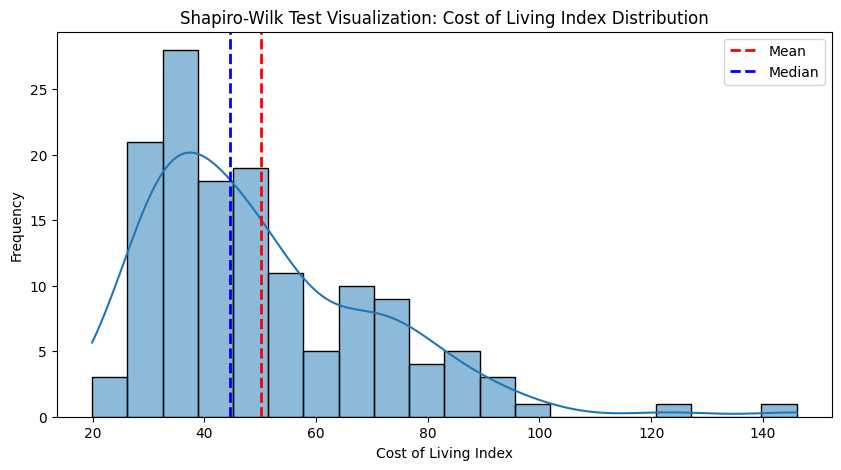

In [43]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Cost_of_Living"], bins=20, kde=True)
plt.axvline(df["Cost_of_Living"].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df["Cost_of_Living"].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
plt.title("Shapiro-Wilk Test Visualization: Cost of Living Index Distribution")
plt.xlabel("Cost of Living Index")
plt.ylabel("Frequency")
plt.legend()
plt.show()

*   The above test is performed to check if the data follows a normal distribution.
*   If the p value is below 0.05, the data is not normally distributed, meaning values are skewed. If the p value is above 0.05, the data is approximately normal, meaning values are values are evenly distributed.
*  The cost of living is not normally distributed, likely due to a concentration of expensive and inexpensive countries at the extremes.





In [44]:
# ANNOVA Test
# Comparing cost of living between top 10 ad bottom 10 countries
top_10 = df.nlargest(10, 'Cost_of_Living')
bottom_10 = df.nsmallest(10, 'Cost_of_Living')
stat, p = stats.f_oneway(top_10['Cost_of_Living'], bottom_10['Cost_of_Living'])
print(f"ANOVA Test: Statistics={stat:4f}, p={p:4f}")

ANOVA Test: Statistics=127.113189, p=0.000000


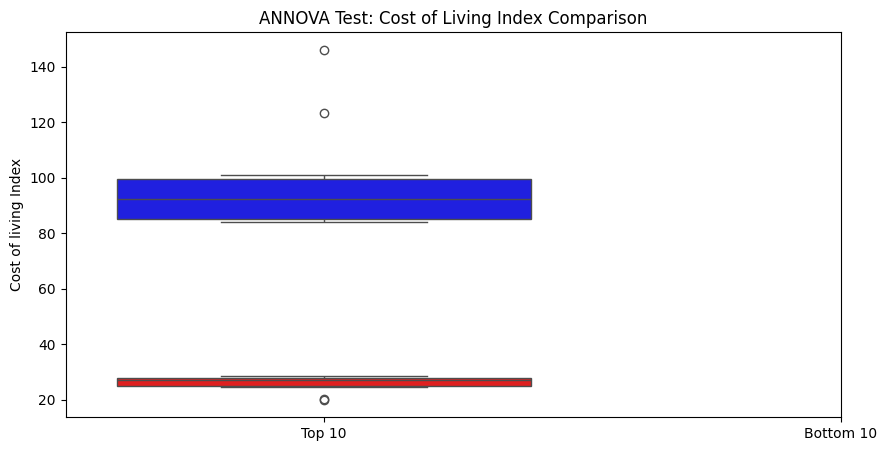

In [45]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=[top_10["Cost_of_Living"]], palette=["blue"])
sns.boxplot(data=[bottom_10["Cost_of_Living"]], palette=["red"])
plt.xticks([0, 1], ["Top 10" , "Bottom 10"])
plt.title("ANNOVA Test: Cost of Living Index Comparison")
plt.ylabel("Cost of living Index")
plt.show()

* The boxplot displays the distribution of Cost of Living Index values for the top 10 and bottom 10 countries.   
* As the boxes do not overlap much, it suggests a strong difference between the two groups.
* This concludes that living costs in the most expensive countries are statistically higher than in the least expensive ones.





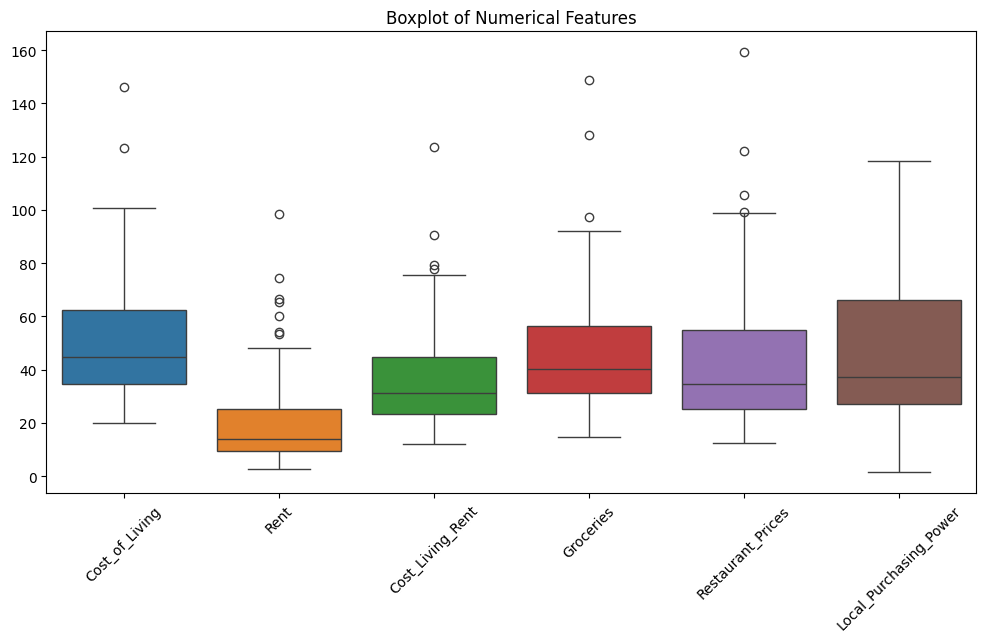

In [46]:
# Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, 2:])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()

The above Boxplot analysis concludes the following points:

*   The cost of living is not normally distributed due to a few countries with exceptionally high costs.
* Expensive countries tend to have high Rent index, Groceries index, and Restaurant price.
* Low-cost countries may have a higher local purchasing index, meaning wages are more aligned with living costs.
*  The presence of outliers suggests strong cost disparities between the most and least expensive countries.





In [47]:
# Predictive modeling
x = df[['Rent', 'Cost_of_Living', 'Groceries', 'Restaurant_Prices', 'Local_Purchasing_Power']]
y = df['Cost_of_Living']

In [48]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# x_train

In [49]:
# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [50]:
# x_train_scaled
# x_test_scaled

In [51]:
# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(x_train_scaled, y_train)
y_pred_lr = lr_model.predict(x_test_scaled)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
print("\nLinear Regression R² Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))


Linear Regression R² Score: 1.0
Linear Regression MAE: 8.374253671458324e-15


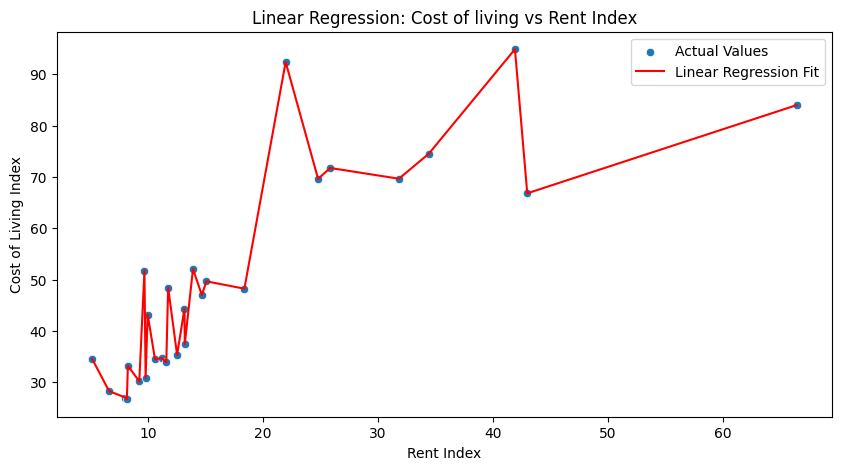

In [52]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_test["Rent"], y=y_test, label="Actual Values")
sns.lineplot(x=x_test["Rent"], y=y_pred_lr, color='red', label="Linear Regression Fit")
plt.title("Linear Regression: Cost of living vs Rent Index")
plt.xlabel("Rent Index")
plt.ylabel("Cost of Living Index")
plt.legend()
plt.show()

* The regression line represents the best-fit trend between rent and cost of living.
* R² score measures how well the rent index explains the cost of living index.
* As the R²score is closer to 1, it indicates a strong linear relationship between cost of living and rent index.






In [53]:
# Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
print("\nRandom Forest R² Score:", r2_score(y_test, y_pred_rf))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))


Random Forest R² Score: 0.9942666980219137
Random Forest MAE: 0.6711785714285697


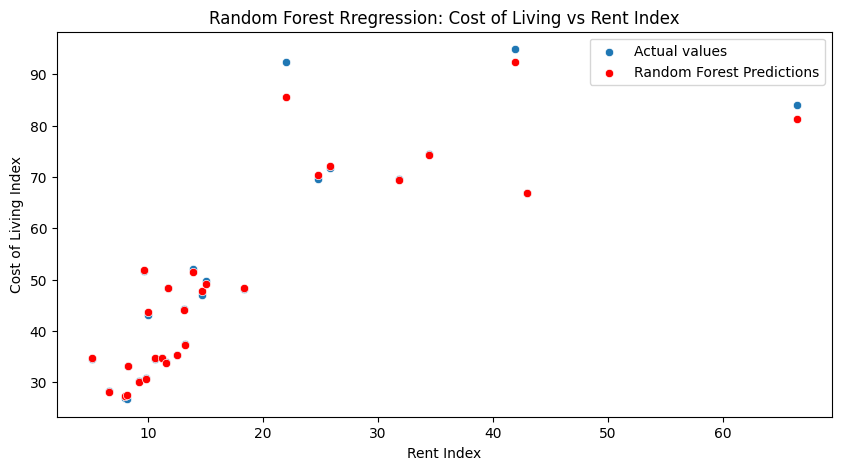

In [54]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_test["Rent"], y=y_test, label="Actual values")
sns.scatterplot(x=x_test["Rent"], y=y_pred_rf, color='red', label="Random Forest Predictions")
plt.title("Random Forest Rregression: Cost of Living vs Rent Index")
plt.xlabel("Rent Index")
plt.ylabel("Cost of Living Index")
plt.legend()
plt.show()

* Random forest can model complex relationships, capturing non-linearity in the data.
* As the R² score is lower than Linear regression the relationship between rent index and cost of living is linear.  



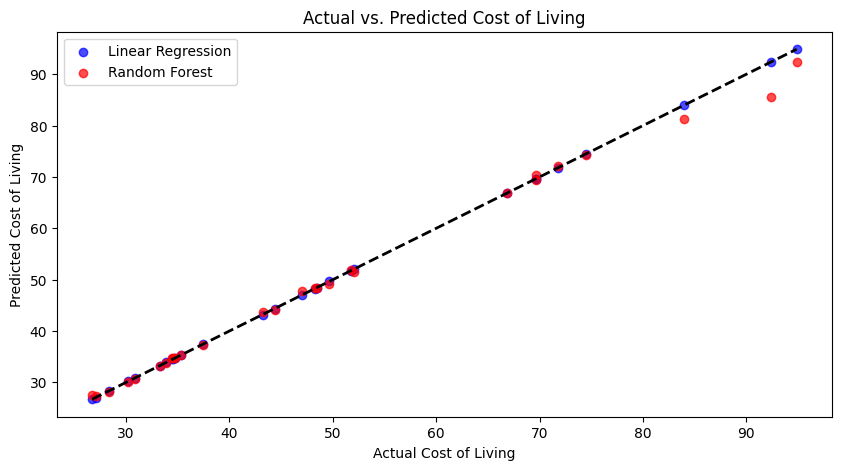

In [55]:
# Visualization for model performance
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='red', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Cost of Living")
plt.ylabel("Predicted Cost of Living")
plt.title("Actual vs. Predicted Cost of Living")
plt.legend()
plt.show()

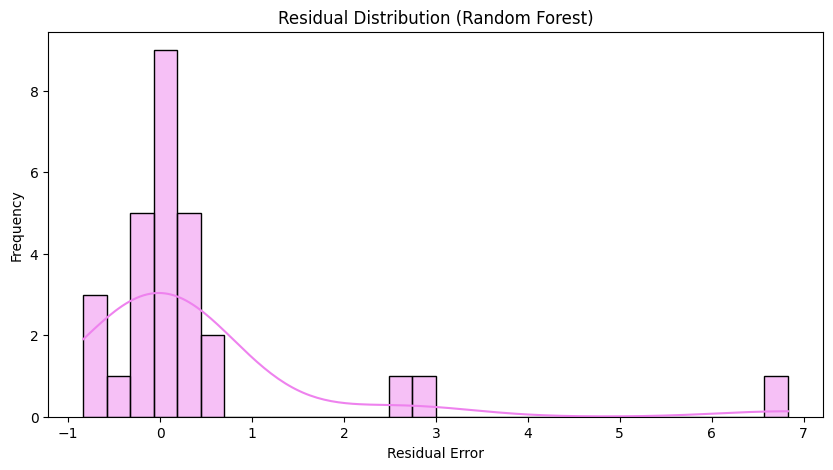

In [56]:
# Residual PLot
plt.figure(figsize=(10, 5))
sns.histplot((y_test - y_pred_rf), bins=30, kde=True, color='violet')
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Random Forest)")
plt.show()


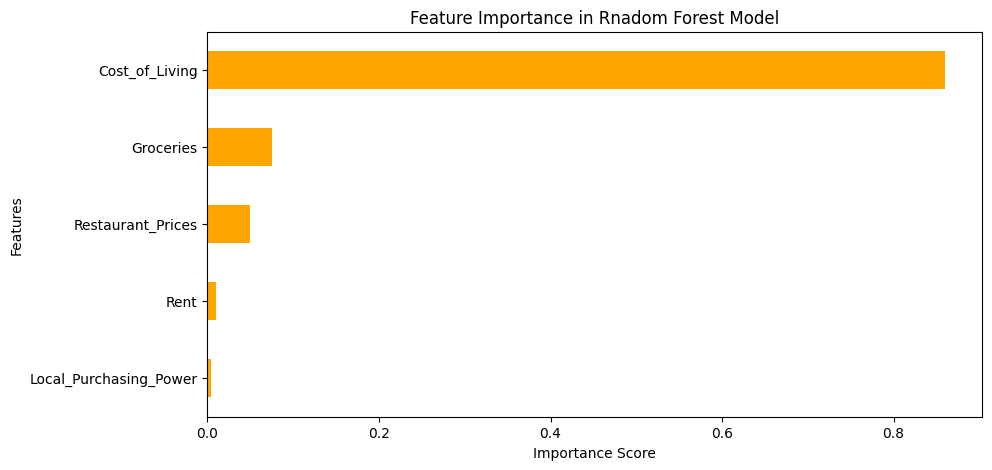

In [57]:
# Feature Importance for random forest
feature_importances = pd.Series(rf_model.feature_importances_, index=x.columns)
plt.figure(figsize=(10, 5))
feature_importances.sort_values().plot(kind='barh', color='Orange')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Rnadom Forest Model")
plt.show()

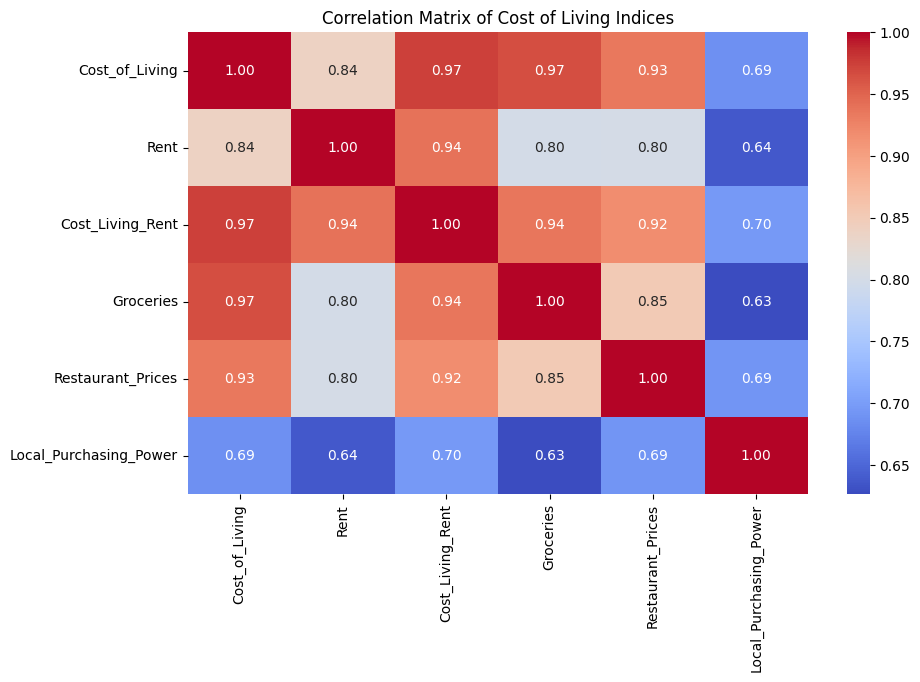

In [58]:
# Correlation matrix to comapre indices
plt.figure(figsize=(10, 6))
sns.heatmap(df.iloc[:, 2:].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Cost of Living Indices")
plt.show()

<Figure size 1000x800 with 0 Axes>

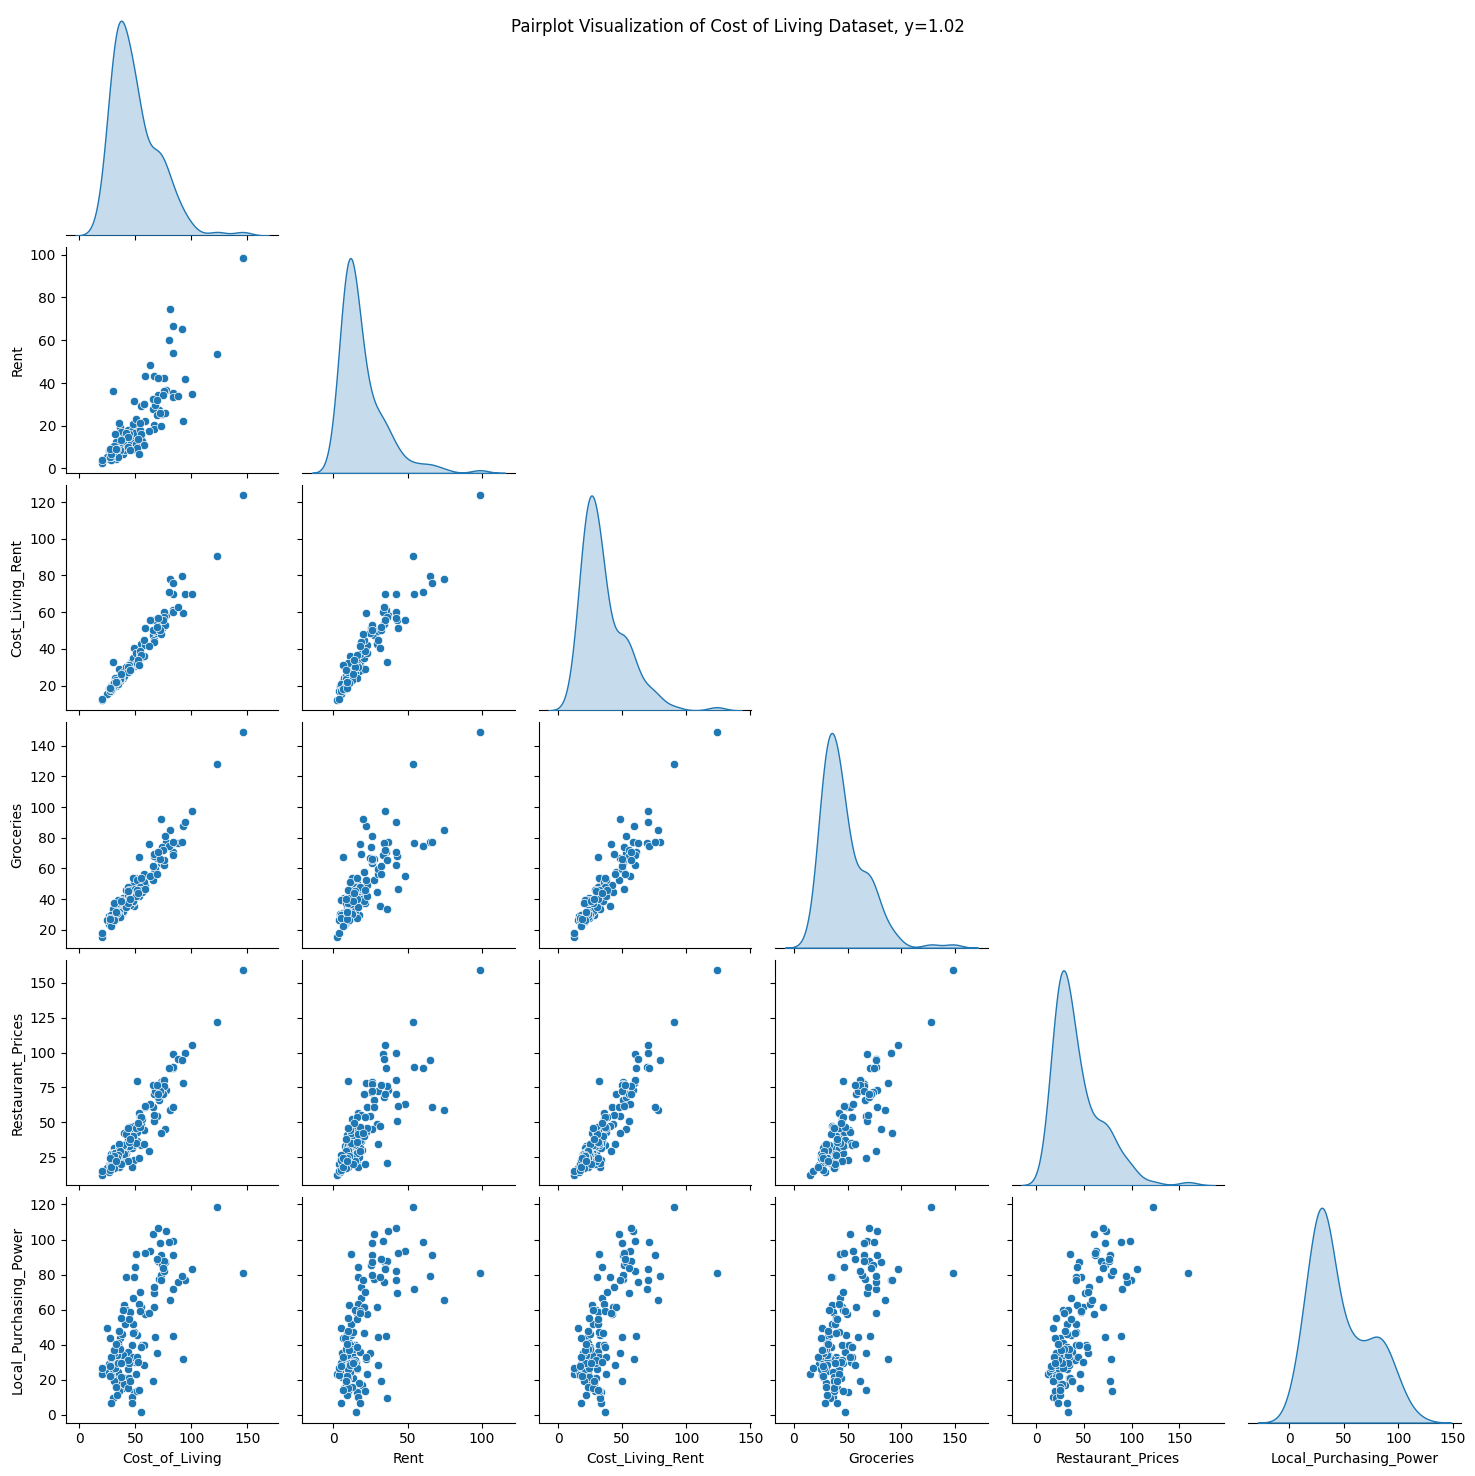

In [59]:
# Pairplot visualization for better insights
plt.figure(figsize=(10, 8))
sns.pairplot(df.iloc[:, 2:], diag_kind='kde', corner=True)
plt.suptitle("Pairplot Visualization of Cost of Living Dataset, y=1.02")
plt.show()

* The Cost of Living has a strong positive correlation with the Rent and Cost of Living Plus Rent, indicating that countries with higher rent costs tend to have higher overall cost of living.
* Groceries and Restaurant prices show a moderate correlation with the cost of living, indicating food expenses play a role but are not the primary driver.
* Local purchasing power appears to have an inverse relationship with the cost of living, meaning that countries with higher purchasing power tend to have a lower cost of living.
* Some scatter plots show non-linear patterns, suggesting a simple linear model may not capture all trends effectively. This justifies exploring random forest regression, which handles complex relationships better than linear regression.
* The diagonal KDE plots reveal that the cost of living and rent index are right-skewed, meaning there are few countries with extremely high values compared to the others.





In [60]:
# Summary report
print("\n===== SUMMARY REPORT =====")
print("Dataset Shape:", df.shape)
print("Missing Values per Column:\n", df.isnull().sum())
print("\nCorrelation with Cost of Living:\n", corr_matrix["Cost_of_Living"].sort_values(ascending=False))
print("\nLinear Regression Performance:")
print(f"R² Score: {lr_r2:.4f}, MAE: {lr_mae:.4f}")
print("\nRandom Forest Performance:")
print(f"R² Score: {rf_r2:.4f}, MAE: {rf_mae:.4f}")




===== SUMMARY REPORT =====
Dataset Shape: (139, 8)
Missing Values per Column:
 Rank                      0
Country                   0
Cost_of_Living            0
Rent                      0
Cost_Living_Rent          0
Groceries                 0
Restaurant_Prices         0
Local_Purchasing_Power    0
dtype: int64

Correlation with Cost of Living:
 Cost_of_Living            1.000000
Cost_Living_Rent          0.974752
Groceries                 0.965435
Restaurant_Prices         0.934505
Rent                      0.838079
Local_Purchasing_Power    0.687244
Name: Cost_of_Living, dtype: float64

Linear Regression Performance:
R² Score: 1.0000, MAE: 0.0000

Random Forest Performance:
R² Score: 0.9943, MAE: 0.6712


**Conclusion**

This project provides a comprehensive analysis of economic data, including data collection, preparation, exploratory analysis, statistical analysis, and predictive modelling. we can conclude few following points from the avove project:

* The cost of Living Index is primarily driven by Rent prices, followed by food and restaurant costs.  
* High-Income countries tend to have high living costs, while low affordable countries have strong purchasing power.
* Machine learning models can Predict living costs with good accuracy, with random forest performing best.
* The dataset provides valuable insights for individuals considering relocation, businesses assessing market conditions, and policymakers analyzing economic factors.






